# Costas Loop
#### This version of the Costas Loop was designed by mirroring the block diagram (Borre, pg 94) rather than using feedback loop design techniques. Each cell represents an block in the diagram.

## Initialization of variables

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import math
import string
#Store the shift registers as a deque, so that deque.rotate{} can be used.
from collections import deque
import os
import sys
nb_dir = os.path.split(os.getcwd())[0]
if nb_dir not in sys.path:
    sys.path.append(nb_dir)
from GoldCode import GoldCode

# Initializations

phi = 0.0              # Original signal phase
phi_hat = 0.3      # phi_hat is the output phase - I channel
phi_hat_Q = phi_hat + np.pi/2    # phi_hat_Q is the output phase - Q channel
freq_offset = 0.3
delta_phi = 0.0    # delta_phi is the phase difference between the incomming signal and the VCO
wn = 0.01          # wn is omega_n, pll bandwidth
zeta = 0.707       # Damping factor of the loop
K = 1000           # K = loop gain, which I assume can be chosen, but this is a sample value
N = 1023           # Number of samples

# Set tap for a particular satellite
tap = (1, 5)

# These are just initializing some vectors for plotting
ref = np.linspace(0, N, N, dtype=int)

## "Incoming signal" block

In [ ]:
def tstSignalGen(ref, phi, freq_offset):
    signal = []       # Save the signal_in for plotting
    for i in ref:

        # Complex input signal
        signal_in = np.cos(phi) + 1j*np.sin(phi)
        phi += freq_offset

        signal.append(signal_in) # Saved for plotting
    return signal

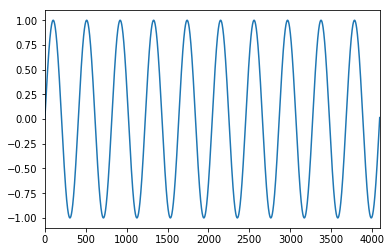

4092000
4092000


In [5]:
import matplotlib.pyplot as plt
import numpy as np


f = 10 * 10**3

Fs = 1023*4*1000
sample = Fs
x = np.arange(sample)
t = x/Fs
y = np.sin(2 * np.pi * f * t)
plt.plot(x, y)
plt.xlim((0,Fs*.001))
plt.show()
print(len(x))
print(len(y))

## "PRN code" block
#### Uses the GoldCode class

In [14]:

Satellite = 1

# Create Code Generator object for chosen Satellite
CodeGen = GoldCode(sat[Satellite - 1]) # Index starts at zero

# Generate CA Code
CACode = CodeGen.getCode(1023)

# Repeat each chip 4 times (See markdown in above cell), to match our ADC sample frequency",
CACodeSampled = np.repeat(CACode,4)

# Repeat entire array for each ms of data sampled
CACodeSampled = np.tile(CACodeSampled,int(SampleLength*1000))

print(CACodeSampled)

SyntaxError: invalid syntax (<ipython-input-14-8b598ff655d1>, line 1)

## "NCO carrier generator" and "90 degree" blocks
#### These two blocks can be combined because they can really be thought of as one block, and they are simple, especially the "90 degree" block.

In [ ]:
for sample in signal:

    # Complex oscillator signal - I channel
    vcoI = np.cos(phi_hat) + 1j*np.sin(phi_hat)
    # Complex oscillator signal - Q channel
    vcoQ = np.cos(phi_hat_Q) + 1j*np.sin(phi_hat_Q)

    delta_phi = np.angle(sample * np.conj(vcoI))
    output.append(vcoI)

    # vx varibles are a buffer to store output changes on transfer function variables ax and bx
    phi_hat =  v0 * b0 + v1 * b1 + v2* b2
    phi_hat_Q = increment
return output


## "Carrier loop discriminator" block
#### There are three possible discriminators as described in Borre, pg 94-95, two of which are included but commented out. 

In [ ]:
# psi = np.arctan(Q/I) # This is the most precise discriminator, but it also takes the most time.
# psi = I*Q # This discriminator is the fastest, but least precise
# psi = math.sign(I) * Q

## Multiply "Incoming signal" and PRN code" blocks

In [ ]:
satCode = GoldCode(tap)
code = satCode.getCode(1023)
tstSig = np.array(tstSignalGen(ref, phi, freq_offset))
INxPRN = tstSig * satCode.getCode(1023)
#print(satCode)
#print()
#print(code)
#print()
#print(tstSig)
#print()
#print(INxPRN)

plt.plot(ref[1:100], INxPRN[1:100])
plt.show()
plt.plot(ref[1:100], code[1:100])
plt.show()
plt.plot(ref[1:100], tstSig[1:100])
plt.show()

## Mutiply ["NCO carrier generator" x ("Incoming signal" x "PRN code")]

In [ ]:
# INxPRN * NCOI 
# as well as
# INxPRN * NCOQ

## "Lowpass filter" blocks
#### Considering the filter only needs to handle 2f, a simple first-order filter seems to be sufficient

In [ ]:
# scipy.signal.butter()

## Carrier loop filter" block